# Introduction

In this project, we're going to build python functions to meassure the results of a classification model. We're then going to compare our results to the results of python's built-in functions to ensure our functions are correct. 

We start with a data set that contains 181 observations. Each observation has a `class` variable with a value of either 0 or 1. It also has a `scored.class` variable which represents the results of the classification model which tried to predict the outcome of the `class` variable.

We're first going to is the pandas `crosstab()` function to get the confusion matrix for our dataset. This will break down our data into the following 4 categories:

- __True Negatives:__ The model predicted 0 and the actual value is 0
- __False Negatives:__ The model predicted 0 and the actual value is 1
- __True Positives:__ The model predicted 1 and the actual value is 1
- __False Positives:__ The model predicted 1 and the actual value is 0

We'll then evaluate the performance of the model by building functions to calculate various evaluation metrics. These metrics include accuracy, precision, sensitivity, specificity, and F1_score. After calculating the metric using our custom functions, we'll run python's built-in functions and compare the results.

After getting our evaluation metrics, we'll write a function to plot the ROC curve and calculate the AUC of our results. We'll then compare those results to the scikit-learn packages that calculate the same metrics.

## Import Libraries

In [107]:
# load all libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn import metrics, model_selection, svm
from yellowbrick.classifier import ROCAUC

# 1) Load Data

We start by reading our data into a pandas data frame

In [108]:
# read csv file into data frame
data = pd.read_csv("https://raw.githubusercontent.com/thesabermaniac/Classification/main/Day4%20Data.csv")

# show snapshot of data
data.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


In [109]:
# check for null values
data.isnull().sum()

pregnant              0
glucose               0
diastolic             0
skinfold              0
insulin               0
bmi                   0
pedigree              0
age                   0
class                 0
scored.class          0
scored.probability    0
dtype: int64

# 2) Confusion Matrix

Now, we'll create a confusion matrix and isolate each value as its own variable

## Build Matrix

In [110]:
# build confusion matrix
confusion_matrix = pd.crosstab(data['class'], data['scored.class'], rownames=["Actual"], colnames=['Prediction'], margins=True)

confusion_matrix

Prediction,0,1,All
Actual,,,
0,119,5,124
1,30,27,57
All,149,32,181


Let's confirm what's represented in the rows and columns

In [111]:
# totals for actual values 
data['class'].value_counts()

0    124
1     57
Name: class, dtype: int64

In [112]:
# totals for predicted values
data['scored.class'].value_counts()

0    149
1     32
Name: scored.class, dtype: int64

This clearly shows that the rows represent the actual values, as the total '0' values are 124 and the total '1' values are 57. Meanwhile, the columns match up with the predicted totals

## Separate values

Next, we'll separate each cell of the confusion matrix into its own variable

In [113]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]
TP = confusion_matrix[1][1]

print("True Negatives:", TN)
print("False Negatives:", FN)
print("False Positives:", FP)
print("True Positives:", TP)

True Negatives: 119
False Negatives: 30
False Positives: 5
True Positives: 27


# 3) Extract Confusion Matrix Values

Let's turn that separation of cells into a generalized function so we can easily use it down the road

In [114]:
def get_results(actual, predicted):
  '''This function takes lists of actual and predicted values from a classification model.
     It returns the True Negative, False Negative, False Positive, and True Positive values
     of the resulting confusion matrix.'''
  confusion_matrix = pd.crosstab(actual, predicted, rownames=["Actual"], colnames=['Prediction'], margins=True)

  # We use try/except to avoid throwing an error if there's no value in the confusion matrix
  try:
    TN = confusion_matrix[0][0]
  except:
    TN = 0
  try:
    FN = confusion_matrix[0][1]
  except:
    FN = 0
  try:
    FP = confusion_matrix[1][0]
  except:
    FP = 0
  try:
    TP = confusion_matrix[1][1]
  except:
    TP = 0

  return TN, FN, FP, TP

# 4) Python Functions

Now, we're going to write our own functions for evaluation metrics and compare our results to python's built-in functions

## Accuracy

Accuracy defines a model's ability to accurately classify an observation. It simply takes the total acurately predicted observations ($TP + TN$) and divides it by the total observations.

$accuracy = \frac {(TP + TN)}{(TN + FN + FP + TP)}$

### Custom Function

In [115]:
def get_accuracy(actual, predicted):
  '''This method accepts lists of actual and predicted values
     and returns the resulting accuracy'''
  TN, FN, FP, TP = get_results(actual, predicted)

  return (TP + TN)/(TN + FN + FP + TP)

### Compare to python function

In [116]:
print(get_accuracy(data['class'], data['scored.class']))

print(accuracy_score(data['class'], data['scored.class']))

0.8066298342541437
0.8066298342541437


As you can see, we got the same result as the sklearn `accuracy_score()` method, indicating our method is correct

## Precision

Our next metric is precision. This meassures how often a model is correct when it predicts a positive value. It simply divides the true positives by the total positve predictions. 

$precision = \frac {TP}{(TP + FP)}$

### Custom Function

In [117]:
def get_precision(actual, predicted):
  '''This method accepts lists of actual and predicted values
     and returns the resulting precision'''
  TN, FN, FP, TP = get_results(actual, predicted)

  return TP/(TP + FP)

### Compare to python function

In [118]:
print(get_precision(data['class'], data['scored.class']))

print(precision_score(data['class'], data['scored.class']))

0.84375
0.84375


As you can see, we got the same value as sklearn's `precision_score()` method, indicating our function is correct

## Sensitivity

Sensitivity meassures a model's ability to correctly classify positive values. It simply divides the true positives by the total positves.

$sensitivity = \frac{TP}{(TP + FN)}$

### Custom Function

In [119]:
def get_sensitivity(actual, predicted):
  '''This method accepts lists of actual and predicted values
     and returns the resulting sensitivity'''
  TN, FN, FP, TP = get_results(actual, predicted)

  return TP/(TP + FN)

### Compare to python function

In [120]:
print(get_sensitivity(data['class'], data['scored.class']))

print(recall_score(data['class'], data['scored.class']))

0.47368421052631576
0.47368421052631576


As you can see, the results of our function are identical to sklearn's `recall_score()`, indicating our function is correct

## Specificity

Specificity meassures the model's ability to classify an observation as negative. It divides the true negatives by the total negatives

$specificity = \frac{TN}{(TN + FP)}$

### Custom Function

In [121]:
def get_specificity(actual, predicted):
  '''This method accepts lists of actual and predicted values
     and returns the resulting specificity'''
  TN, FN, FP, TP = get_results(actual, predicted)

  return TN/(TN + FP)

### Compare to python function

In [122]:
print(get_specificity(data['class'], data['scored.class']))

print(recall_score(data['class'], data['scored.class'], pos_label=0))

0.9596774193548387
0.9596774193548387


As you can see, the results of our function are identical to sklearn's `recall_score()`, indicating our function is correct

## F1 Score

F1-score meassures the harmonic mean of precision and sensitivity. This is useful when you want to capture the balance between precision and recall. You want to make sure you're model is correctly predicting as many positive values as possible (precision), but you also want to make sure it's not incorrectly predicting negatives in the process (sensitivity).

$F_1score = 2\frac{(precision \times sensitivity)}{(precision + sensitivity)}$

In [123]:
def get_f1_score(actual, predicted):
  '''This method accepts lists of actual and predicted values
     and returns the resulting f1_score'''
  TN, FN, FP, TP = get_results(actual, predicted)
  precision = get_precision(actual, predicted) 
  sensitivity = get_sensitivity(actual, predicted)

  return ((2 * precision * sensitivity)/(precision + sensitivity))

In [124]:
print(get_f1_score(data['class'], data['scored.class']))

print(f1_score(data['class'], data['scored.class']))

0.6067415730337079
0.6067415730337079


As you can see, the results of our function are identical to sklearn's `f1_score()`, indicating our function is correct

## Classification Report

Let's run sklearn's `classification_report()` to verify all our metrics once again

In [131]:
print(classification_report(data['class'], data['scored.class']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



As you can see, all these metrics match up with both the metrics from our custom functions as well as the metrics from sklearn's built-in functions. It looks like these metrics are all correct

# 5) ROC Curve and AUC

The ROC, or receiver operating characteristic, curve summarizes the trade=off between the true positive rate and false positive rate. It plots the true positive rate against the false positive rate for different thresholds. The more area there is under the curve, or AUC, the better the model is. That means the model is predicting more true positives and less false positives at lower thresholds.

## Plot ROC Curve

In [125]:
def get_false_positive_rate(actual, predicted):
  '''This method accepts lists of actual and predicted values
     and returns the resulting false positive rate'''
  TN, FN, FP, TP = get_results(actual, predicted)

  return FP/(TN + FP)

In [129]:
def plot_roc(actual, predicted, prob):
  '''This method takes lists of the actual classifications, the predicted classifications,
     and the probabibilty for each observation, plots the ROC, and returns lists for the
     true positive and false positve rates'''
  # set threshold iterator
  thresholds = np.arange(0, 1, 0.01)

  # initialize rate lists
  true_positive_rates = []
  false_positive_rates = []

  # iterate over threshold iterator, if the probability is over the 
  # threshold, consider it a positive, otherwise consider it negative
  for i in thresholds:
    new_predicted = []
    for j in range(len(prob)):
      if prob[j] < i:
        new_predicted.append(0)
      else:
        new_predicted.append(1)
    
    # get true positivity rate (aka sensitivity) of new predicted values
    TPR = get_sensitivity(actual, pd.Series(new_predicted))
    true_positive_rates.append(TPR)

    # get false positive rate
    FPR = get_false_positive_rate(actual, pd.Series(new_predicted))
    false_positive_rates.append(FPR)

  # plot false positive rate against true positive rate
  plt.step(false_positive_rates, true_positive_rates, '-', label="model")
  plt.plot([0, 1], [0, 1], 'r--', label = 'random classifier')

  # add labels and title
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()

  plt.show()
  
  return true_positive_rates, false_positive_rates

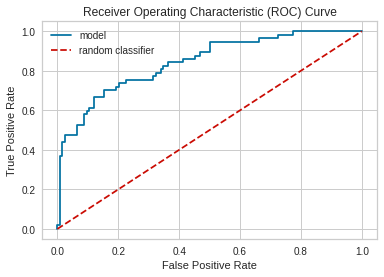

In [130]:
tpr_list, fpr_list = plot_roc(data['class'], data['scored.class'], data['scored.probability'])

The red dotted line in this chart represents a classifier model if it were randomly classifying each observation. You can see our model is significantly better than that, as you'd expect. Let's calculate the AUC to determine how much better it is.

## Calculate AUC

In [94]:
def get_auc(true_positives, false_positives):
  '''This method takes the true positives and false positives of 
     a model and returns the area under the curve'''
  
  # set the x and y to tp and fp respectively
  x = true_positives.copy()
  y = false_positives.copy()

  # sort axes in ascending order
  x.sort()
  y.sort()

  # run numpy's built-in trapezoidal function to get the auc
  return np.trapz(x, y)

In [95]:
get_auc(tpr_list, fpr_list)

0.8488964346349746

As you can see our AUC score is ~.849. This is significantly better than random classification which would be 0.5

## Compare to sklearn function

Now we're going to compare our results to sklearn's `plot_roc_curve()` function. This requires a classifier model so we'll use sklearn's `SVC` classifier as our instance.

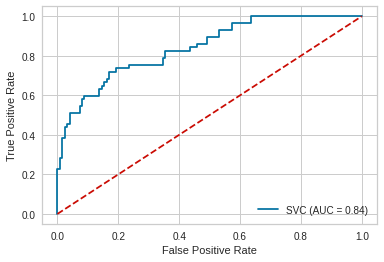

In [106]:

X = data[['pregnant', 'glucose', 'diastolic', 'skinfold', 'insulin', 'bmi', 'pedigree', 'age']].copy()
y = data['class'].copy()

clf = svm.SVC(random_state=0)
clf.fit(X, y)

metrics.plot_roc_curve(clf, X, y) 
plt.plot([0, 1], [0, 1], 'r--', label = 'naive classifier')

plt.show()

It looks like the roc curve we get from sklearn's `plot_roc_curve()` is pretty in line with our function. Likewise, the sklearn function calculated an AUC of 0.84 which is in line with our AUC.